In [2]:
import selenium.webdriver as wb
import time
import numpy as np
import csv
import re
#导入库

In [3]:
def init_csv(filepath='test.csv'):
    headers = ['UP昵称', '会员等级', '会员类别', '关注', '粉丝', '获赞', '播放', '生日', '投稿']
    with open(filepath, 'w', newline='',encoding='utf-8')as f:
        f_csv = csv.writer(f)
        f_csv.writerow(headers)
#定义函数

In [4]:
def write_csv(filepath,datas):
    with open(filepath, 'a+', newline='',encoding='utf-8')as f:
        f_csv = csv.writer(f)
        f_csv.writerow(datas)

In [5]:
def read_uid(filepath):
    x=[]
    with open(filepath, 'r', newline='',encoding='utf-8')as f:
        csv_read = csv.reader(f)
        for line in csv_read:
            line[0]=re.findall('\d+',line[0])[0]
            x.append(line[0])
    return x

In [6]:
class Spider(object):

    def __init__(self, display=True) -> None:
        super().__init__()
        option = wb.ChromeOptions()
        # 忽略driver自身的警告|错误等输出
        option.add_experimental_option(
            'excludeSwitches', ['enable-logging'])
        # 禁用图片加载,加速爬取url等页面数据,图片数据待爬取url后由requests库实现
        # option.add_experimental_option(
        #     'prefs', {"profile.managed_default_content_settings.images": 2})
        if display == False:
            option.headless = True
            print('程序运行，设置为无窗口模式')
        option.binary_location = r"C:\Program Files\Google\Chrome\Application\chrome.exe"
        # 浏览器驱动器初始化，需指明路径与参数
        try:
            self.driver = wb.Chrome(
                r"C:\Users\Ludy\Desktop\workspace\assets\chromedriver.exe", options=option)
        except:
            self.driver = wb.Chrome(
                r"C:\Users\Ludy_Lab\Desktop\workspace\assets\chromedriver.exe", options=option)

    def login(self):
        #获取这个地址下的网页
        self.driver.get('https://space.bilibili.com/'+'51896064')
        #随机暂停一会，防止被发现
        self.random_sleep(2)
        #登录按钮
        login_elm = self.driver.find_element_by_css_selector(
            '#internationalHeader > div > div > div.nav-user-center > div.user-con.logout > div:nth-child(1) > div > span > div > span')
        #点击登录按钮
        login_elm.click()
        wds = self.driver.window_handles
        #点击完后会有新界面出来，要切换过去
        self.driver.switch_to_window(wds[-1])
        #还是等一下别太快了，不然会看不到界面的元素
        self.random_sleep(2)
        #账号
        username_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#login-username')
        #密码
        password_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#login-passwd')
        #点击登录
        login2_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#geetest-wrap > div > div.btn-box > a.btn.btn-login')
        #填入账号
        username_elm.send_keys('**********')
        #填入密码
        password_elm.send_keys('**********')
        #稍等一会
        self.random_sleep(1)
        #点击登录
        login2_elm.click()
        # 8秒的时间进行人机结合登录=_=
        
        ####大招在这里，这个就是人机结合，简直神了
        time.sleep(8)

    def random_sleep(self, delay=3):
        #用numpy的随机数
        tmp = np.random.random()
        #使用time.sleep来让进程暂停
        time.sleep(delay*(tmp+0.5))

    def fetch_by_UID(self, UID='51896064'):
        #爬哪个页面
        self.driver.get('https://space.bilibili.com/'+UID)
        self.random_sleep(3)
        
        #up的名字
        up_name_elm = self.driver.find_element_by_css_selector('#h-name')
        print(up_name_elm.text)
        up_name = up_name_elm.text

        #up的等级
        up_level_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#app > div.h > div.wrapper > div.h-inner > div.h-user > div > div.h-basic > div:nth-child(1) > a.h-level.m-level')
        print(up_level_elm.get_attribute('lvl'))
        up_level = up_level_elm.get_attribute('lvl')

        #up的年度大会员
        up_member_elm = self.driver.find_element_by_css_selector(
            '#app > div.h > div.wrapper > div.h-inner > div.h-user > div > div.h-basic > div:nth-child(1) > a.h-vipType')
        print(up_member_elm.text)
        up_member = up_member_elm.text

        #up关注了多少人
        up_follow_elm = self.driver.find_element_by_css_selector('#n-gz')
        print(up_follow_elm.text)
        up_follow = up_follow_elm.text

        #up被夺少人关注
        up_followby_elm = self.driver.find_element_by_css_selector('#n-fs')
        print(up_followby_elm.text)
        up_followby = up_followby_elm.text

        #多少个赞
        up_getzan_elm = self.driver.find_element_by_css_selector('#n-bf')
        print(up_getzan_elm.text)
        up_getzan = up_getzan_elm.text

        #多少次播放，这里的数据id和获赞一样，估计是网页的bug
        up_numofplay_elm = self.driver.find_element_by_xpath(
            '/html/body/div[2]/div[2]/div/div[1]/div[3]/div[2]/p[2]')
        print(up_numofplay_elm.text)
        up_numofplay = up_numofplay_elm.text

        #生日，有的有，有的没有，所以得加一场捕捉
        birthday = 'None'
        try:
            birthday = self.driver.find_element_by_css_selector(
                '#page-index > div.col-2 > div.section.user > div.info > div.content > div > div > div.item.birthday > span.text').text
        except:
            pass
        print(birthday)

        up_tougao_elm = self.driver.find_element_by_css_selector(
            '#navigator > div > div.n-inner.clearfix > div.n-tab-links > a.n-btn.n-video.n-audio.n-article.n-album > span.n-num').text
        tougao = up_tougao_elm
        xiangbu = 'Error'
        try:
            up_tougao_elm = self.driver.find_element_by_xpath(
                '//*[@id="navigator"]/div/div[1]/div[1]/a[3]/span[2]')
            up_tougao_elm.click()
            self.random_sleep(3)
            up_xiangbu_elm = self.driver.find_element_by_css_selector(
                '#page-video > div > div.contribution-sidenav > div > div > ul > li:nth-child(4) > span')
            xiangbu = up_xiangbu_elm.text
        except:
            pass
        if xiangbu != 'Error':
            tougao = str(int(tougao)-int(xiangbu))
            
        print(tougao)
        self.random_sleep(2)
        return (up_name, up_level, up_member, up_follow, up_followby, up_getzan, up_numofplay, birthday, tougao)


In [8]:
    csv_path = r'C:\Users\Ludy_Lab\Desktop\workspace\codes\selenium_porject\bilibli_ups.csv'
    uid_path = r'C:\Users\Ludy_Lab\Desktop\workspace\codes\selenium_porject\UID100.csv'
    uid_list = read_uid(uid_path)
    worker = Spider(display=True)   
    try:
        worker.login()
    except:
        print('登录失败')
        time.sleep(10)
        exit()
    
    try:
        init_csv(csv_path)
    except:
        pass
    
    for i in range(len(uid_list)):
        try:
            write_csv(csv_path,worker.fetch_by_UID(uid_list[i]))
            print('*'*20+'\n',i,'success')
        except:
            print(i,'error')
        if i>5:
            break
    #弄5个做样例看看结果
    time.sleep(10)

<ipython-input-6-ee9fb249ac44>:31: DeprecationWarning: use driver.switch_to.window instead
  self.driver.switch_to_window(wds[-1])


爱做饭的芋头SAMA
6

254
372万
1047.3万
1.6亿
09-25
121
********************
 0 success
啊吗粽
6
年度大会员
196
338.1万
2374.2万
2.6亿
05-28
202
********************
 1 success
79471674218_bili
0

3
0
0
0
None
0
********************
 2 success
波桑吃遍世界
6

117
139.6万
643.1万
1亿
07-30
157
********************
 3 success
宝剑嫂
6
年度大会员
376
328.5万
1771.5万
1.9亿
07-08
186
********************
 4 success
长歌与小见见
6
年度大会员
74
207.7万
1225.9万
5亿
07-07
5 error
-纯黑-
6
年度大会员
0
321万
631.7万
3.7亿
None
465
********************
 6 success


In [12]:
import seaborn as sns

In [14]:
import seaborn as sns
import pandas as pd
sns.set_theme(style="darkgrid")
# sns.set_theme(style=)
# Samuel Norman Seaborn is a fictional character portrayed 
# by Rob Lowe on the television serial drama The West Wing. 
#读入三个csv格式数据
x = pd.read_csv(r"C:\Users\Ludy_Lab\Desktop\workspace\codes\selenium_porject\bilibli_ups.csv")


<AxesSubplot:xlabel='关注', ylabel='Count'>

C:\Users\Ludy_Lab\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20851 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ludy_Lab\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27880 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ludy_Lab\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20851 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Ludy_Lab\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27880 missing from current font.
  font.set_text(s, 0, flags=flags)


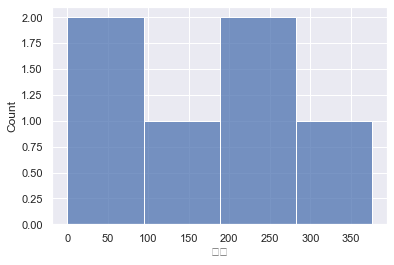

In [15]:
sns.histplot(data=x,x='关注')

In [19]:
x

,UP昵称,会员等级,会员类别,关注,粉丝,获赞,播放,生日,投稿
0,爱做饭的芋头SAMA,6,NaN,254,372万,1047.3万,1.6亿,09-25,121
1,啊吗粽,6,年度大会员,196,338.1万,2374.2万,2.6亿,05-28,202
2,79471674218_bili,0,NaN,3,0,0,0,None,0
3,波桑吃遍世界,6,NaN,117,139.6万,643.1万,1亿,07-30,157
4,宝剑嫂,6,年度大会员,376,328.5万,1771.5万,1.9亿,07-08,186
5,-纯黑-,6,年度大会员,0,321万,631.7万,3.7亿,None,465


In [25]:
x.head(2)

,UP昵称,会员等级,会员类别,关注,粉丝,获赞,播放,生日,投稿
0,爱做饭的芋头SAMA,6,NaN,254,372万,1047.3万,1.6亿,09-25,121
1,啊吗粽,6,年度大会员,196,338.1万,2374.2万,2.6亿,05-28,202


In [26]:
x.tail(2)

,UP昵称,会员等级,会员类别,关注,粉丝,获赞,播放,生日,投稿
4,宝剑嫂,6,年度大会员,376,328.5万,1771.5万,1.9亿,07-08,186
5,-纯黑-,6,年度大会员,0,321万,631.7万,3.7亿,None,465


In [29]:
x.sort_values(by='播放')
x

,UP昵称,会员等级,会员类别,关注,粉丝,获赞,播放,生日,投稿
0,爱做饭的芋头SAMA,6,NaN,254,372万,1047.3万,1.6亿,09-25,121
1,啊吗粽,6,年度大会员,196,338.1万,2374.2万,2.6亿,05-28,202
2,79471674218_bili,0,NaN,3,0,0,0,None,0
3,波桑吃遍世界,6,NaN,117,139.6万,643.1万,1亿,07-30,157
4,宝剑嫂,6,年度大会员,376,328.5万,1771.5万,1.9亿,07-08,186
5,-纯黑-,6,年度大会员,0,321万,631.7万,3.7亿,None,465


In [31]:
x.loc[0]
#看下0号索引的人

UP昵称    爱做饭的芋头SAMA
会员等级             6
会员类别           NaN
关注             254
粉丝            372万
获赞         1047.3万
播放            1.6亿
生日           09-25
投稿             121
Name: 0, dtype: object

In [32]:
x.loc[1]
#看下1号索引的人

UP昵称        啊吗粽
会员等级          6
会员类别      年度大会员
关注          196
粉丝       338.1万
获赞      2374.2万
播放         2.6亿
生日        05-28
投稿          202
Name: 1, dtype: object

In [34]:
x.loc[1]['生日']
#看下1号索引的人的生日

'05-28'